Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:

- Cargar los dos CSV como datasets.
- Identifica las columnas de ambos datasets: ¿hay diferencias entre ambos?
- Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.
- Revisa el número de nulos que hay por cada columna, así como su porcentaje.
- Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).
- Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.
- Obtén un resumen estadístico del dataframe sin valores nulos.
- Muestra de forma gráfica la relación entre la familia y la salud.
- Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
- Muestra la matriz de correlación del daframe.
- Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.
- ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.
- Muestra la distribución del grado de distopía en función de la región.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

- Cargar los dos CSV como datasets.

In [2]:
data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')

- Identifica las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [3]:
#Sacamos las cabeceras de ambas datasets en set para poder compararlos:
header_2015 = set(data_2015)
header_2016 = set(data_2016)
#Columnas en común de ambos datasets:
elem_in_common = header_2015 & header_2016
elem_in_common

{'Country',
 'Dystopia Residual',
 'Economy (GDP per Capita)',
 'Family',
 'Freedom',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Health (Life Expectancy)',
 'Region',
 'Trust (Government Corruption)'}

In [4]:
#Columnas que solo están en el dataset de 2015:
header_2015.difference(header_2016)

{'Standard Error'}

In [5]:
#Columnas que solo están en el dataset de 2016:
header_2016.difference(header_2015)

{'Lower Confidence Interval', 'Upper Confidence Interval'}

- Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [6]:
total_data =  data_2015.append(data_2016)

In [7]:
total_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404,3.564
153,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.288,3.432
154,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192,3.414
155,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936,3.202


- Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [8]:
print("*CANTIDAD de datos nulos por columna en el dataframe")

print(total_data.isnull().sum())

print("----------------------------------")

print("*PORCENTAJE de datos nulos por columna en el dataframe")

print(total_data.isnull().sum()/len(total_data)*100)

*CANTIDAD de datos nulos por columna en el dataframe
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)        

- Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [9]:
max_lower = total_data['Lower Confidence Interval'].max()
min_lower = total_data['Lower Confidence Interval'].min()
max_upper = total_data['Upper Confidence Interval'].max()
min_upper = total_data['Upper Confidence Interval'].min()
rand_upper = random.uniform(min_lower, max_lower)
rand_lower = random.uniform(min_upper, max_upper)

In [10]:
total_data['Lower Confidence Interval'] = total_data['Lower Confidence Interval'].fillna(rand_lower)
total_data['Upper Confidence Interval'] = total_data['Upper Confidence Interval'].fillna(rand_upper)

print("*CANTIDAD de datos nulos por columna en el dataframe")
print(total_data.isnull().sum())

*CANTIDAD de datos nulos por columna en el dataframe
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
dtype: int64


- Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [11]:
mean_standard_squared = (total_data['Standard Error'].mean())**2
total_data['Standard Error'] = total_data['Standard Error'].fillna(mean_standard_squared)

print("*CANTIDAD de datos nulos por columna en el dataframe")
print(total_data.isnull().sum())

*CANTIDAD de datos nulos por columna en el dataframe
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


- Obtén un resumen estadístico del dataframe sin valores nulos.

In [12]:
total_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,4.654713,5.119550
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.023495,0.878994
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,4.031003,4.759420
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,4.031003,4.759420
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,5.231500,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


- Muestra de forma gráfica la relación entre la familia y la salud.

C:\Users\danig\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


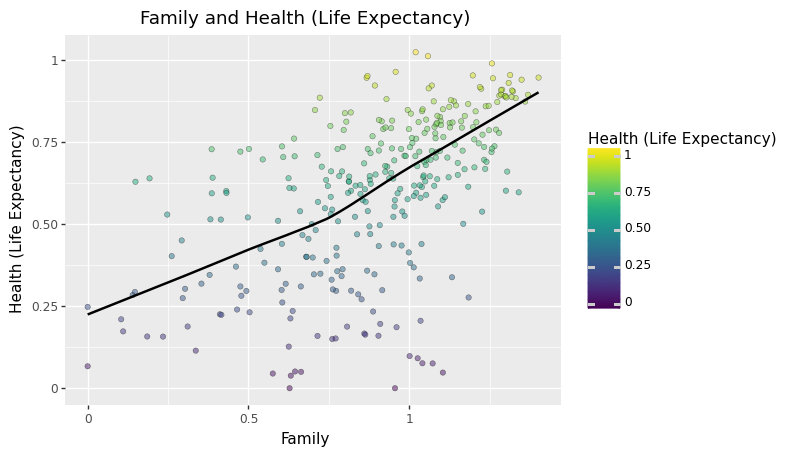

<ggplot: (138999641516)>

In [13]:
(
    ggplot(total_data) +
     geom_point(aes(x='Family', y = 'Health (Life Expectancy)', fill = 'Health (Life Expectancy)'),
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='Family', y = 'Health (Life Expectancy)')
    )
    + labs(title='Family and Health (Life Expectancy)', 
         x = 'Family',
         y = 'Health (Life Expectancy)')
)

- Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).

C:\Users\danig\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


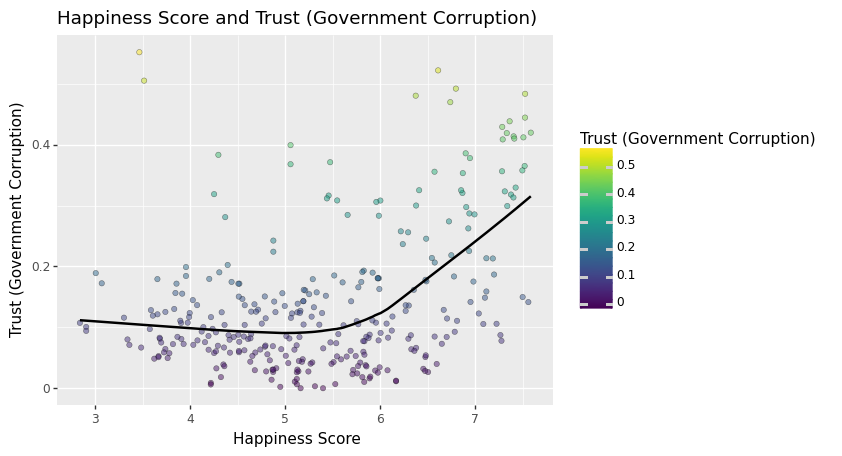

<ggplot: (139000254943)>

In [14]:
(
    ggplot(total_data) +
     geom_point(aes(x='Happiness Score', y = 'Trust (Government Corruption)', fill = 'Trust (Government Corruption)'),
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='Happiness Score', y = 'Trust (Government Corruption)')
    )
    + labs(title='Happiness Score and Trust (Government Corruption)', 
         x = 'Happiness Score',
         y = 'Trust (Government Corruption)')
)

- Muestra la matriz de correlación del daframe.

In [15]:
total_data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.557011,-0.640779
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.558787,0.643264
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,-0.540786,-0.363582
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.522995,0.563223
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.173247,0.297932
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.315769,0.403261
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.187784,0.272374
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.201514,0.235931
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.103140,0.111170
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.415870,0.425408


- Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [16]:
idx = total_data.groupby(['Country'])['Happiness Score'].transform(max) == total_data['Happiness Score']
total_data = total_data[idx]
total_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.034110,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,4.031003,4.75942
1,Iceland,Western Europe,2,7.561,0.048840,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.031003,4.75942
2,Denmark,Western Europe,3,7.527,0.033280,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,4.031003,4.75942
3,Norway,Western Europe,4,7.522,0.038800,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.031003,4.75942
4,Canada,North America,5,7.427,0.035530,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.031003,4.75942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.515,0.002293,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,3.444000,3.58600
152,Benin,Sub-Saharan Africa,153,3.484,0.002293,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404000,3.56400
154,Togo,Sub-Saharan Africa,155,3.303,0.002293,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192000,3.41400
155,Syria,Middle East and Northern Africa,156,3.069,0.002293,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2.936000,3.20200


In [17]:
# Tengo que hacer este paso porque algunos paises tienen la misma puntuación de felicidad,
# por lo que tengo entradas duplicadas como:
# Suriname, Trinidad and Tobago, Laos, Comoros and Burundi.
idx_2 = total_data['Country'].duplicated()
total_data_cleaned = total_data[~idx_2]
total_data_cleaned

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.034110,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,4.031003,4.75942
1,Iceland,Western Europe,2,7.561,0.048840,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,4.031003,4.75942
2,Denmark,Western Europe,3,7.527,0.033280,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,4.031003,4.75942
3,Norway,Western Europe,4,7.522,0.038800,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.031003,4.75942
4,Canada,North America,5,7.427,0.035530,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,4.031003,4.75942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Madagascar,Sub-Saharan Africa,148,3.695,0.002293,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075,3.621000,3.76900
151,Rwanda,Sub-Saharan Africa,152,3.515,0.002293,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,3.444000,3.58600
152,Benin,Sub-Saharan Africa,153,3.484,0.002293,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.404000,3.56400
154,Togo,Sub-Saharan Africa,155,3.303,0.002293,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.192000,3.41400


- ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

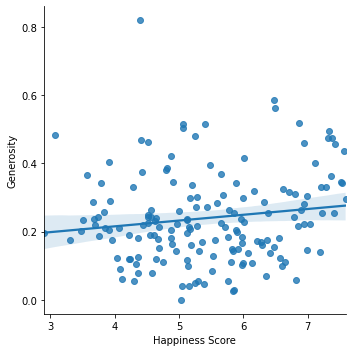

In [18]:
sns.lmplot(x='Happiness Score', y = 'Generosity', data = total_data_cleaned)

Con los resultados de la gráfica, al ver la distribución de los puntos y, sobre todo, la horizontalidad de la recta de regresión, podemos concluir que no hay relación entre la felicidad y la generosidad.

- Muestra la distribución del grado de distopía en función de la región.

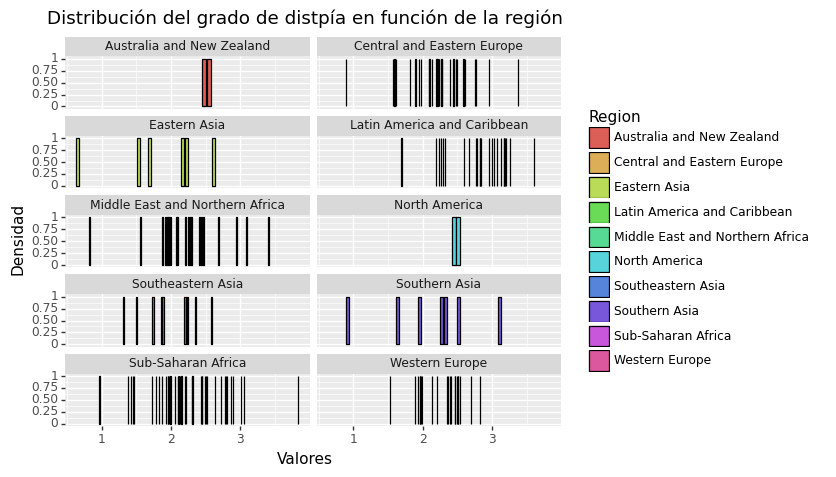

<ggplot: (139000225747)>

In [19]:
(ggplot(total_data_cleaned)
+ aes(x='Dystopia Residual', fill = 'Region')
+ geom_bar(color = 'black', alpha = 1, show_legend=True)
+ facet_wrap('~Region', ncol = 2)
+ labs(
x = 'Valores',
y = 'Densidad',
title = 'Distribución del grado de distpía en función de la región'
)
)